# ICS4U – Python Programming Evaluation 2 Project
## Instructions
These ICS4U Grade 12 Computer Science python coding questions will form a part of your final grade for this course and are to be handed in for grading. 

For all of the following questions:

- Use a Python IDE of your choice and create a coded solution to each of the given problems.

- Hand in commented .py files for your solution.

Your grade will be based on your ability to demonstrate the overall expectations from the Ontario Computer Studies Curriculum

<details>

<summary>Overall Expectations Being Evaluated</summary>

A3 – Designing Algorithms

- Read and write data to external data files

- Process elements of a 2D list

A4 – Code Maintenance

- Write appropriate internal documentation explaining main points of the code

</details>

## Important
Since you will be using File Input and Output in these questions, store the name of your data file in a variable in the very first line at the top of your program.  Then use that variable in your code to open the file.

The reason for this is so that I can easily change the file name with my own test data when grading.  I won’t have to go and change anything in your code other than the first line. 

In [ ]:
#Example

inputPath = "dataFileIN.txt"
outputPath = "dataFileOUT.txt"

#Use that variable in your code
file = open(inputPath,"r")

<br>

## ICS4U Python Programming Evaluation Question 2
File Name:  `ICS4UfindThatMine.py`

This program is based on the original Windows Game of “Minesweeper”.  The goal of that game was to find out where all the mines were in a large grid.  To help you, the game showed a number in one of the grid spaces that told you how many mines there were in a square adjacent to it.  
 
For example, in the following 4 x 4 mine field, the mines are represented by an * character.

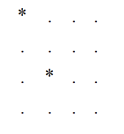

If we would represent the same mine field with the hints, then we would end up with

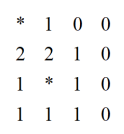

Your job is going to be to write a program that generates those hint numbers given any mine field of any size.

The input for your program will be from a file that contains the mine field image.  

- Mines are represented by “*” characters

- Empty spaces are represented by “.” characters

- There is a single space between all entries 

- Your program needs to be able to handle any size mine field with any number of mines at any location.

The output for your program will be the mine field image with all the empty spaces replaced by their hint values (which are the number of adjacent mines). 


- Write that data to a file, don’t display it to the screen.

In [12]:
def readMineFile(filename):
    file = open(filename, "r")
    lines = file.readlines()
    file.close()

    field = []
    for line in lines:
        field.append(line.strip().split())
    return field


def countMines(field, r, c):
    rows = len(field)
    cols = len(field[0])

    directions = [
        (-1,-1), (-1,0), (-1,1),
        (0,-1),          (0,1),
        (1,-1), (1,0), (1,1)
    ]

    count = 0
    for dr, dc in directions:
        nr = r + dr
        nc = c + dc

        if 0 <= nr < rows and 0 <= nc < cols:
            if field[nr][nc] == "*":
                count += 1
    return count


def createHintField(field):
    rows = len(field)
    cols = len(field[0])

    result = []

    for r in range(rows):
        rowList = []
        for c in range(cols):
            if field[r][c] == "*":
                rowList.append("*")
            else:
                rowList.append(str(countMines(field, r, c)))
        result.append(rowList)

    return result


def writeHintFile(filename, field):
    file = open(filename, "w")
    for row in field:
        file.write(" ".join(row) + "\n")
    file.close()


def main():
    mineField = readMineFile("mine.txt")
    hintField = createHintField(mineField)
    writeHintFile("mine_hint.txt", hintField)


main()